In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

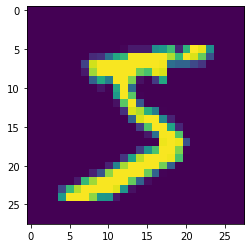

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_test_flattened.shape

(10000, 784)

## 2 Layer Artificial Neural Network

Following ANN containes only 2 layers, input and output.<br>Activation function used is sigmoid.

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
   optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.sparse_categorical_crossentropy,
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4696 - sparse_categorical_accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3035 - sparse_categorical_accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - sparse_categorical_accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - sparse_categorical_accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - sparse_categorical_accuracy: 0.9254


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 899us/step - loss: 0.2669 - sparse_categorical_accuracy: 0.9258


[0.26687687635421753, 0.9258000254631042]

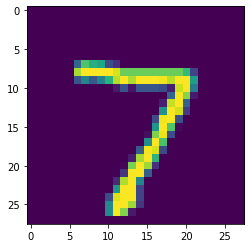

In [15]:
plt.imshow(X_test[0])

In [16]:
y_pred = model.predict(X_test_flattened)
y_pred[0].argmax()

7

In [17]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    4,   10,    2,    3,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  924,   16,    9,    3,   13,    9,   42,    4],
       [   2,    0,   22,  920,    0,   21,    4,   10,   22,    9],
       [   1,    1,    2,    1,  912,    0,   13,    3,   12,   37],
       [   8,    3,    2,   35,   11,  752,   19,    6,   48,    8],
       [   7,    3,    4,    1,    7,    6,  924,    2,    4,    0],
       [   1,    5,   24,    8,    9,    1,    0,  942,    5,   33],
       [   4,   10,    5,   15,    9,   15,   10,   10,  889,    7],
       [   8,    7,    2,    8,   28,    5,    0,   14,   12,  925]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

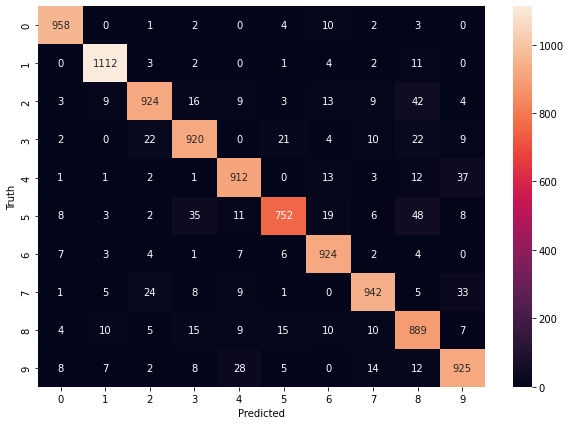

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

## 3 Layer Artificial Neural Network

Following ANN containes 3 layers, input, i hidden and output layer.<br>Activation function in input layer is relu and in other 2 layers are sigmoid.<br>Adding hidden layer may increase our accuracy.

In [20]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
   optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.sparse_categorical_crossentropy,
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - sparse_categorical_accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1248 - sparse_categorical_accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0846 - sparse_categorical_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0491 - sparse_categorical_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0373 - sparse_categorical_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0305 - sparse_categorical_accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0252 - sparse_categorical_accuracy: 0.9921
Epoch 9/10
1875/1875 [==========

In [21]:
y_pred2 = model2.predict(X_test_flattened)

In [22]:
y_pred_labels2 = [np.argmax(i) for i in y_pred]
y_pred_labels2[:5]

[7, 2, 1, 0, 4]

In [23]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    4,   10,    2,    3,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  924,   16,    9,    3,   13,    9,   42,    4],
       [   2,    0,   22,  920,    0,   21,    4,   10,   22,    9],
       [   1,    1,    2,    1,  912,    0,   13,    3,   12,   37],
       [   8,    3,    2,   35,   11,  752,   19,    6,   48,    8],
       [   7,    3,    4,    1,    7,    6,  924,    2,    4,    0],
       [   1,    5,   24,    8,    9,    1,    0,  942,    5,   33],
       [   4,   10,    5,   15,    9,   15,   10,   10,  889,    7],
       [   8,    7,    2,    8,   28,    5,    0,   14,   12,  925]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

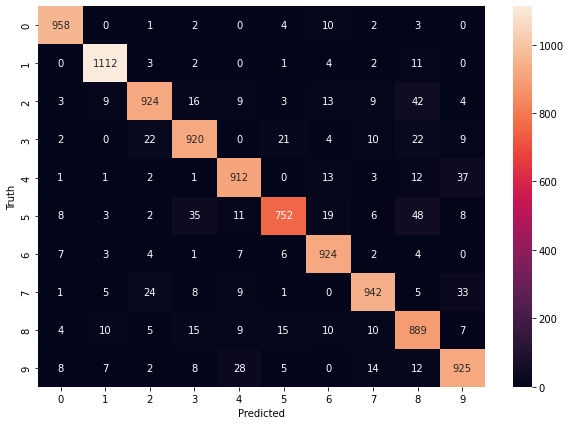

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [27]:
model2.save("model.hdf5")